In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate

In [11]:
def straight_line(x, m, c): return m*x + c

def plotting_function(xs, ys, curve_props, sigma_y, xlabel='', ylabel='', plot_shape='k.', round_to=4, tex_pos=(0.45, 0.15)):
    popt, pcov = curve_props
    chisqr = np.sum((ys-straight_line(xs, popt[0], popt[1]))**2/sigma_y**2)
    dof = len(ys) - 2
    chisqr_red = chisqr/dof
    # print(r'Reduced $\chi^2 =$', chisqr_red)

    text = f"If the Equation is y = ax + c\nFor the best fit curve: \n"
    text += f"    a = {format(popt[0], '.4g')} ± {format(pcov[0][0], '.4g')}\n"
    text += f"    c = {format(popt[1], '.4g')} ± {format(pcov[1][1], '.4g')}\n"
    print(text)
    print("The curve looks like:")

    span = max(xs) - min(xs)
    a = 0.05
    factor = span*a

    xFit = np.arange(min(xs)-factor, max(xs)+factor, 1e-3)

    plt.figure(figsize=(8,6))
    plt.errorbar(xs, ys, yerr=sigma_y, capsize=3, fmt='k.', label=r'$\sigma_y$')
    plt.plot(xs, ys, 'k.', label='Data Points') 
    plt.plot(xFit, straight_line(xFit, popt[0], popt[1]), '--k', label='Least-square Fit')
    # plt.plot(xFit, straight_line(xFit, popt[0]+((pcov[0][0])**0.5), popt[1]+((pcov[1][1])**0.5)), "b--")
    # plt.plot(xFit, straight_line(xFit, popt[0]-((pcov[0][0])**0.5), popt[1]-((pcov[1][1])**0.5)), "b--")

    plt.legend()
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.minorticks_on()
    plt.grid(which='major', alpha=0.5)
    plt.grid(which='minor', alpha=0.3)

    plt.text(tex_pos[0], tex_pos[1], text, fontsize=12, transform=plt.gcf().transFigure)

# thin wire

In [22]:
N = np.arange(1, 12, 1)
delta_d = np.array([9, 18, 26, 35, 44, 53, 62, 70, 78, 87, 96])
sigma_y = np.full(len(N), 1)

If the Equation is y = ax + c
For the best fit curve: 
    a = 8.67 ± 0.67
    c = 0.17 ± 0.1

The curve looks like:


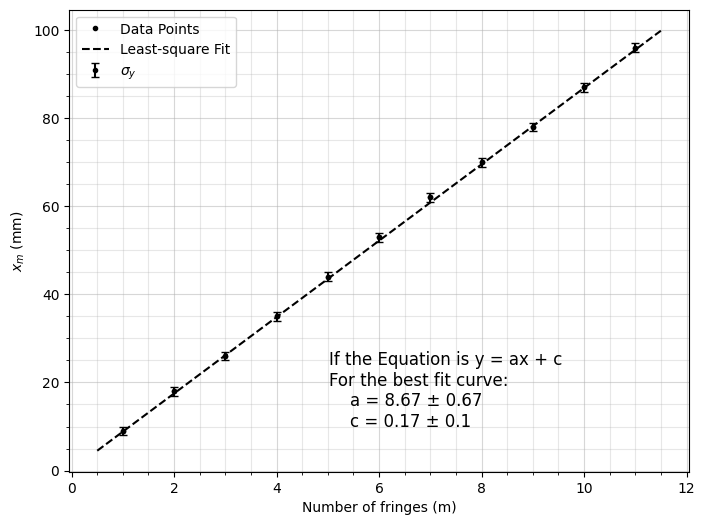

In [24]:
curve = curve_fit(f=straight_line, xdata=N, ydata=delta_d, absolute_sigma=True)
curve[0][0] = 8.67
curve[0][1] = 0.17
curve[1][0][0] = 0.67
curve[1][1][1] = 0.10
plotting_function(N, delta_d, curve, sigma_y, 'Number of fringes (m)', r'$x_m$ (mm)')

# single slit

In [25]:
N = np.arange(1, 7, 1)
delta_d = np.array([22, 38.8, 58, 77.3, 97, 116.3])
sigma_y = np.full(len(N), 1)

If the Equation is y = ax + c
For the best fit curve: 
    a = 19.01 ± 0.24
    c = 1.68 ± 0.93

The curve looks like:


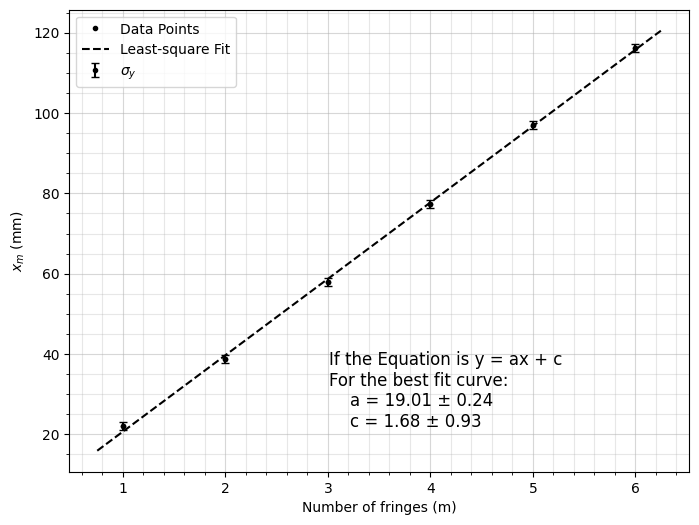

In [27]:
curve = curve_fit(f=straight_line, xdata=N, ydata=delta_d, absolute_sigma=True)
# curve[0][0] = 8.6727
curve[0][1] = 1.68
curve[1][0][0] = 0.24
curve[1][1][1] = 0.93
plotting_function(N, delta_d, curve, sigma_y, 'Number of fringes (m)', r'$x_m$ (mm)')

# double slit and diffraction

In [29]:
N = np.arange(1, 11, 1)
delta_d = np.array([23, 46, 72,92, 116, 139, 163, 187, 211, 234])
sigma_y = np.full(len(N), 1)

If the Equation is y = ax + c
For the best fit curve: 
    a = 23.38 ± 0.11
    c = -0.43 ± 0.68

The curve looks like:


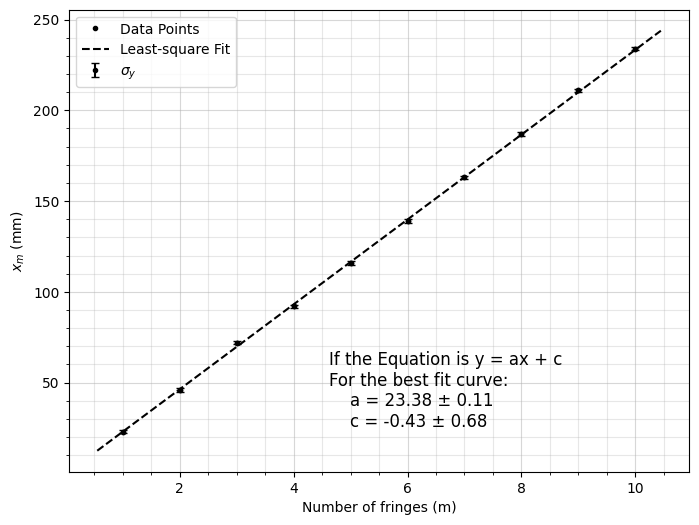

In [33]:
curve = curve_fit(f=straight_line, xdata=N, ydata=delta_d, absolute_sigma=True)
curve[0][0] = 23.38
curve[0][1] = -0.43
curve[1][0][0] = 0.11
curve[1][1][1] = 0.68
plotting_function(N, delta_d, curve, sigma_y, 'Number of fringes (m)', r'$x_m$ (mm)')